<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/SimpleRNN_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow-gpu
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 450kB 56.1MB/s 
     |████████████████████████████████| 3.8MB 45.3MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.1 which is incompatible.


'2.1.0'

In [0]:
from tensorflow.keras.layers import Input, SimpleRNN,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Synthentic Data Creation
series_normal = np.sin(.1*np.arange(200))
series_noisy = np.sin(.1*np.arange(200)) + np.random.randn(200)*0.1 # Second Part adds noise to the sine wave

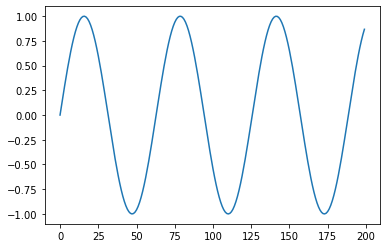

In [4]:
# Plot normal Sine Wave
plt.plot(series_normal)
plt.show()

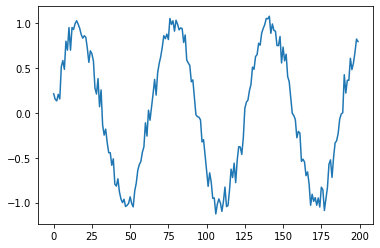

In [5]:
# Plot noisy Sine Wave
plt.plot(series_noisy)
plt.show()

In [6]:
# Setting up normal sine wave data for time series prediction
T = 10 # Amount of values used to predict the next value
X_norm = [] # Holds the inputs
Y_norm = [] # Holds the targets
for t in range((len(series_normal))- T): # The length of N is equal to the total length of the data set minus the length of the time sequence
  x = series_normal[t:t+T] # Holds a set of T values
  X_norm.append(x) # Appends the set of T values to list X
  y = series_normal[t+T] # Holds the target of the set of T values
  Y_norm.append(y) # appends the target to list Y

X_norm = np.array(X_norm).reshape(-1, T, 1) # Makes list X an array and sets the size to (N X T x 1) for the SimpleRNN
Y_norm= np.array(Y_norm) # Makes Y an array, no reshaping necessary as the lenth of Y is already equal to X
N_norm = len(X_norm) # Sets N to the length of array X
print('X.shape =', X_norm.shape, ', Y.shape =',Y_norm.shape)

X.shape = (190, 10, 1) , Y.shape = (190,)


In [7]:
# # Setting up noisy sine wave data for time series prediction
T = 10 # Amount of values used to predict the next value
X_noise = [] # Holds the inputs
Y_noise = [] # Holds the targets
for t in range((len(series_noisy))- T): # The length of N is equal to the total length of the data set minus the length of the time sequence
  x = series_noisy[t:t+T] # Holds a set of T values
  X_noise.append(x) # Appends the set of T values to list X
  y = series_noisy[t+T] # Holds the target of the set of T values
  Y_noise.append(y) # appends the target to list Y

X_noise = np.array(X_noise).reshape(-1, T, 1) # Makes list X an array and sets the size to (N X T x 1) for the SimpleRNN
Y_noise = np.array(Y_noise) # Makes Y an array, no reshaping necessary as the lenth of Y is already equal to X
N_noise = len(X_noise) # Sets N to the length of array X
print('X.shape =', X_noise.shape, ', Y.shape =',Y_noise.shape)

X.shape = (190, 10, 1) , Y.shape = (190,)


In [0]:
# Creating the SimpleRNN model

i = Input(shape=(T,1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)

model_norm = Model(i,x)
model_norm.compile(optimizer=Adam(lr=0.1),
              loss='mse')

model_noise = Model(i,x)
model_noise.compile(optimizer=Adam(lr=0.1),
              loss='mse')

In [9]:
r_norm = model_norm.fit(X_norm[:-N_norm//2], Y_norm[:-N_norm//2], epochs=120, batch_size=32 ,validation_data=(X_norm[-N_norm//2:], Y_norm[-N_norm//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/120
95/95 [==============================] - 2s 22ms/sample - loss: 1.8176 - val_loss: 0.5029
Epoch 2/120
95/95 [==============================] - 0s 379us/sample - loss: 0.5579 - val_loss: 0.4340
Epoch 3/120
95/95 [==============================] - 0s 357us/sample - loss: 0.4953 - val_loss: 0.4268
Epoch 4/120
95/95 [==============================] - 0s 383us/sample - loss: 0.4580 - val_loss: 0.4413
Epoch 5/120
95/95 [==============================] - 0s 336us/sample - loss: 0.4181 - val_loss: 0.4287
Epoch 6/120
95/95 [==============================] - 0s 369us/sample - loss: 0.3685 - val_loss: 0.3336
Epoch 7/120
95/95 [==============================] - 0s 341us/sample - loss: 0.2823 - val_loss: 0.1852
Epoch 8/120
95/95 [==============================] - 0s 331us/sample - loss: 0.1743 - val_loss: 0.0816
Epoch 9/120
95/95 [==============================] - 0s 329us/sample - loss: 0.1110 - val_loss: 0.0641
Epoch 10/120
95/95 [==========

In [10]:
r_noise = model_noise.fit(X_norm[:-N_norm//2], Y_norm[:-N_norm//2], epochs=120, batch_size=32,validation_data=(X_norm[-N_norm//2:], Y_norm[-N_norm//2:]))

Train on 95 samples, validate on 95 samples
Epoch 1/120
95/95 [==============================] - 1s 7ms/sample - loss: 0.0569 - val_loss: 0.0492
Epoch 2/120
95/95 [==============================] - 0s 470us/sample - loss: 0.0419 - val_loss: 0.0142
Epoch 3/120
95/95 [==============================] - 0s 371us/sample - loss: 0.0091 - val_loss: 0.0241
Epoch 4/120
95/95 [==============================] - 0s 423us/sample - loss: 0.0186 - val_loss: 0.0023
Epoch 5/120
95/95 [==============================] - 0s 327us/sample - loss: 0.0045 - val_loss: 0.0166
Epoch 6/120
95/95 [==============================] - 0s 357us/sample - loss: 0.0094 - val_loss: 0.0048
Epoch 7/120
95/95 [==============================] - 0s 397us/sample - loss: 0.0025 - val_loss: 0.0062
Epoch 8/120
95/95 [==============================] - 0s 441us/sample - loss: 0.0068 - val_loss: 0.0034
Epoch 9/120
95/95 [==============================] - 0s 449us/sample - loss: 0.0029 - val_loss: 0.0092
Epoch 10/120
95/95 [===========

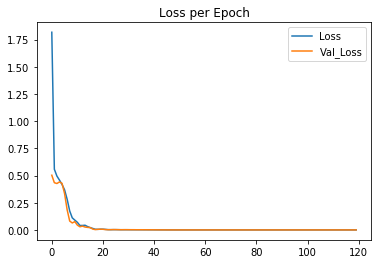

In [11]:
plt.plot(r_norm.history['loss'], Label= 'Loss')
plt.plot(r_norm.history['val_loss'], Label= 'Val_Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

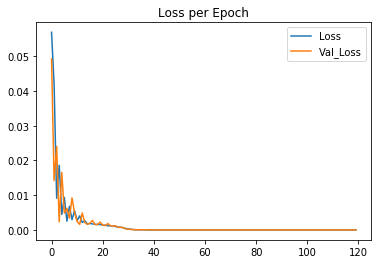

In [12]:
plt.plot(r_noise.history['loss'], Label= 'Loss')
plt.plot(r_noise.history['val_loss'], Label= 'Val_Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.show()

In [0]:
# Forecast future values using only self predictions for making future predictions,(Not using the true targets)
validation_targets_norm = Y_norm[-N_norm//2:]
validation_predictions_norm = []

# Last Training input, begins where the validation set starts
last_x = X_norm[-N_norm//2]

while len(validation_predictions_norm) < len(validation_targets_norm):
  p = model_norm.predict(last_x.reshape(1,T,1))[0,0] # Model.predct returns N=Samples by K=Output Nodes output in this case it returns a matrix [1,1] so the first position [0,0] must be indexed to get the value

# Update Predictions List
  validation_predictions_norm.append(p)

# Make the New Input
  last_x = np.roll(last_x, -1) # np.roll shifts the array. Negative values shift to the left, positive values shift to the right
  last_x[-1] = p

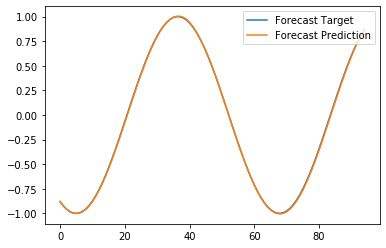

In [14]:
plt.plot(validation_targets_norm, label ='Forecast Target')
plt.plot(validation_predictions_norm, label='Forecast Prediction')
plt.legend()
plt.show()

In [0]:
# Forecast future values using only self predictions for making future predictions,(Not using the true targets)
validation_targets_noise = Y_noise[-N_noise//2:]
validation_predictions_noise = []

# Last Training input, begins where the validation set starts
last_x = X_noise[-N_noise//2]

while len(validation_predictions_noise) < len(validation_targets_noise):
  p = model_noise.predict(last_x.reshape(1,T,1))[0,0] # Model.predct returns N=Samples by K=Output Nodes output in this case it returns a matrix [1,1] so the first position [0,0] must be indexed to get the value

# Update Predictions List
  validation_predictions_noise.append(p)

# Make the New Input
  last_x = np.roll(last_x, -1) # np.roll shifts the array. Negative values shift to the left, positive values shift to the right
  last_x[-1] = p

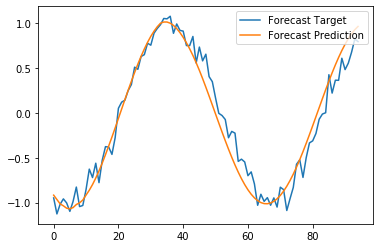

In [16]:
plt.plot(validation_targets_noise, label ='Forecast Target')
plt.plot(validation_predictions_noise, label='Forecast Prediction')
plt.legend()
plt.show()